In [41]:
library(MASS)
library(mvtnorm)
# install.packages("truncnorm")
library(truncnorm)


In [42]:
?rtruncnorm

truncnorm              package:truncnorm               R Documentation

_T_h_e _T_r_u_n_c_a_t_e_d _N_o_r_m_a_l _D_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Density, distribution function, quantile function, random
     generation and expected value function for the truncated normal
     distribution with mean equal to 'mean' and standard deviation
     equal to 'sd'.

_U_s_a_g_e:

     dtruncnorm(x, a=-Inf, b=Inf, mean = 0, sd = 1)
     ptruncnorm(q, a=-Inf, b=Inf, mean = 0, sd = 1)
     qtruncnorm(p, a=-Inf, b=Inf, mean = 0, sd = 1)
     rtruncnorm(n, a=-Inf, b=Inf, mean = 0, sd = 1)
     etruncnorm(a=-Inf, b=Inf, mean=0, sd=1)
     vtruncnorm(a=-Inf, b=Inf, mean=0, sd=1)
     
_A_r_g_u_m_e_n_t_s:

     x,q: vector of quantiles.

       p: vector of probabilites.

       n: number of observations. If 'length(n) > 1', the length is
          taken to be the number required.

       a: vector of lower bounds. These may be

In [43]:
d <- read.table("data.txt", header = TRUE,stringsAsFactors = TRUE)
xx<-d

xx$chest_pain_type<-factor(xx$chest_pain_type,levels = c('angina', 'abnang', 'notang', 'asympt'))
xx$resting_ecg<-factor(xx$resting_ecg,levels = c('norm', 'abn', 'hyp'))
xx$slope<-factor(xx$slope,levels=c('up', 'flat', 'down'))
xx$thal<-factor(xx$thal,levels = c('norm', 'fix', 'rev'))
xx$number_of_vessels_colored<-factor(xx$number_of_vessels_colored,levels=c('0.0','1.0','2.0','3.0'))
xx<- na.omit(xx)
xx[is.na(xx)]
y<-xx[,15]
length(y)
xx<-xx[,1:13]
p<- ncol(xx)
p_y<-length(levels(y))-1
n<- nrow(xx)
# ex<-''
# for (i in 1:p){
#     ex<-paste(ex,'+',names(xx)[i])
# }
# ex
# y
# d
# attach(x)


character(0)

[1] 296

Standardlizerd

In [44]:
x<-data.frame(lapply(xx,as.numeric))
x<- (x-lapply(x,mean))/lapply(lapply(x,var),sqrt)
model1=polr(formula = y ~ Age + sex + chest_pain_type + Trestbps + cholesteral + fasting_blood_sugar + resting_ecg + max_heart_rate + exercise_induced_angina + oldpeak + slope + number_of_vessels_colored + thal, data=xx, method='logistic')
model2=polr(formula = y ~ Age + sex + chest_pain_type + Trestbps + cholesteral + fasting_blood_sugar + resting_ecg + max_heart_rate + exercise_induced_angina + oldpeak + slope + number_of_vessels_colored + thal,data=x,method='logistic')
beta.var<-cov(x)
summary(model1)
summary(model2)



Re-fitting to get Hessian




Call:
polr(formula = y ~ Age + sex + chest_pain_type + Trestbps + cholesteral + 
    fasting_blood_sugar + resting_ecg + max_heart_rate + exercise_induced_angina + 
    oldpeak + slope + number_of_vessels_colored + thal, data = xx, 
    method = "logistic")

Coefficients:
                                  Value Std. Error  t value
Age                          -0.0099935   0.018507 -0.53998
sexmale                       1.0222127   0.367711  2.77993
chest_pain_typeabnang         0.7769730   0.660389  1.17654
chest_pain_typenotang         0.2399629   0.591573  0.40564
chest_pain_typeasympt         1.6820276   0.573980  2.93046
Trestbps                      0.0137198   0.007801  1.75872
cholesteral                   0.0002331   0.002714  0.08589
fasting_blood_sugartrue      -0.0665000   0.380992 -0.17454
resting_ecgabn                1.9147327   0.946847  2.02222
resting_ecghyp                0.4268208   0.275524  1.54912
max_heart_rate               -0.0126454   0.007587 -1.66663
exercis


Re-fitting to get Hessian




Call:
polr(formula = y ~ Age + sex + chest_pain_type + Trestbps + cholesteral + 
    fasting_blood_sugar + resting_ecg + max_heart_rate + exercise_induced_angina + 
    oldpeak + slope + number_of_vessels_colored + thal, data = x, 
    method = "logistic")

Coefficients:
                             Value Std. Error t value
Age                       -0.02072     0.1608 -0.1289
sex                        0.39263     0.1612  2.4362
chest_pain_type            0.54031     0.1651  3.2723
Trestbps                   0.22040     0.1353  1.6290
cholesteral                0.03391     0.1349  0.2513
fasting_blood_sugar       -0.10929     0.1291 -0.8467
resting_ecg                0.21830     0.1342  1.6265
max_heart_rate            -0.34617     0.1609 -2.1519
exercise_induced_angina    0.20535     0.1428  1.4383
oldpeak                    0.27227     0.1571  1.7326
slope                      0.39226     0.1655  2.3702
number_of_vessels_colored  0.86715     0.1474  5.8823
thal                      

In [45]:
ilogit<-function(theta){
  out<-exp(theta)/(1+exp(theta))
  return(out)
}
# yy<- as.numeric(yyy)
# y<- matrix(0,ncol = p_y, nrow=n )
# for(i in 1:n){
#   y[i,yy[i]] <- 1
# }
y<- as.numeric(y)
y

[1] 1 3 2 1 1 1 4 1 3 2 1 1 3 1 1 1 1 2 4 5 1 1 1 1 4 1 3 2 1 1 1 4 2 4 1 5 1
 [38] 1 1 2 5 1 5 1 1 1 1 3 1 2 2 2 2 1 1 3 1 2 1 3 3 2 1 3 2 1 4 2 2 2 1 2 1 1
 [75] 4 1 1 1 4 1 1 1 1 1 1 4 1 1 1 2 3 4 1 1 1 3 4 2 2 1 3 3 1 1 1 4 3 4 5 1 4
[112] 1 1 1 1 5 4 2 1 1 2 1 2 1 2 5 1 1 1 1 1 1 5 4 2 2 2 3 1 2 1 4 1 2 1 5 2 1
[149] 2 1 1 4 3 1 1 1 1 3 2 3 1 4 3 1 4 1 1 1 2 1 1 1 1 1 4 4 4 1 2 1 5 1 4 2 1
[186] 1 1 1 1 1 1 1 4 2 1 1 1 4 3 1 3 4 3 2 1 1 1 1 1 3 1 3 3 2 4 1 1 2 1 1 1 1
[223] 1 1 1 2 3 2 1 2 1 3 1 2 1 1 1 2 1 3 1 4 1 3 5 1 3 3 2 1 4 2 2 3 4 2 3 1 1
[260] 2 1 1 2 1 1 1 1 1 4 1 3 2 2 1 4 4 1 1 1 1 1 4 1 1 5 3 1 1 5 1 1 1 1 2 1 1

In [46]:
# m_32<- matrix(1:6,ncol = 2)
# m_32
# v_2<- 1:2
# v_2
# m_32*v_2
# matrix(c(1,2,3,4),ncol=3,nrow=3)
# dmultinom()
# # rmultinom(10000,1,prob = c(0.2,0.2,0.2,0.2,0.2))
# dmultinom(rmultinom(10000,1,prob = c(0.2,0.2,0.2,0.2,0.2))[,1:5],prob = matrix(0.2,nrow=5,ncol=10000)[,1:5])
# # dmultinom(4,prob = c(0.2,0.2,0.2,0.2,0.2))
# # cbind(c(1,2),c(1,2))
# bb<-1:5
# as.numeric(bb<=2)

In [47]:
set.seed(100)
S<- 1000*5*1
nuhp<-5
beta.pm<-rep(0,p)
beta.psd<- nuhp*rep(2,p)
gamma<- rbinom(p,1,0.5)
beta<- mvrnorm(1,beta.pm,beta.var)
beta_int.pm<- rep(0,p_y)
beta_int.psd<-nuhp*rep(4,p_y)
beta_int<- rnorm(1,0,4)
# print(beta_int)
for(i in 2:p_y){beta_int<- c(beta_int,rtruncnorm(1,a=beta_int[i-1],mean=0,sd=4))}
new_beta_int<- beta_int
Beta<- P<-NULL
Beta_int<- NULL
Gamma<-NULL
nu<-0.02
nue<-5
acc<- acc_i<- NULL
x<-as.matrix(x)
for(i in 1:S){
    for(j in 1:p) {
        new_gamma<- gamma
        new_gamma[j]<- 1-gamma[j]
        pp0<-x %*% matrix(-beta*gamma)
        pp1<-x %*% matrix(-beta*new_gamma)
        p0 <- p1<- matrix(0,nrow=n)
        for(i in 1:p_y){
            ys<-ifelse(y<i,1,0)
            yb<-1-ys
            p0<- p0*(ys-yb)+ilogit(pp0+beta_int[i])*yb
            p1<- p1*(ys-yb)+ilogit(pp1+beta_int[i])*yb
        }
        ys<-ifelse(y==5,1,0)
        p0<-(1-p0)*ys+p0*(1-ys)
        p1<- (1-p1)*ys+p1*(1-ys)
        # print(cbind(p0,p1)[index])
        logp <- sum(log(p1)-log(p0))
        # print(logp)
        pj<-rbinom(1,1,ilogit(logp))
        gamma[j]<- pj*new_gamma[j]+(1-pj)*gamma[j]
        }
    new_beta<- rmvnorm(1,beta,nu*beta.var)
    
    pp0<-x %*% matrix(-beta*gamma)
    pp1<-x %*% matrix(-new_beta*gamma)
    p0<- p1<- matrix(0,nrow=n)
    for(i in 1:p_y){
        ys<-ifelse(y<i,1,0)
        yb<-1-ys
        p0<- p0*(ys-yb)+ilogit(pp0+beta_int[i])*yb
        p1<- p1*(ys-yb)+ilogit(pp1+beta_int[i])*yb
    }
    ys<-ifelse(y==5,1,0)
    p0<-(1-p0)*ys+p0*(1-ys)
    p1<- (1-p1)*ys+p1*(1-ys)
    # print(p1)
    logp <- sum(log(p1)-log(p0))+sum((dnorm(new_beta,beta.pm,beta.psd,log=T)-dnorm(beta,beta.pm,beta.psd,log=T))*gamma)
    # logp <- sum(dbinom(y,1,p1,log=T)-dbinom(y,1,p0,log=T))+sum((dnorm(new_beta,beta.pm,beta.psd,log=T)-dnorm(beta,beta.pm,beta.psd,log=T))*c(1,gamma))#-new_jbeta+jbeta
    if(log(runif(1))<logp){
        beta<-new_beta*(gamma)+beta*(1-gamma)
        acc <- c(acc,1)
    }
    else{
        acc<-c(acc,0)
    }
    a0<- -Inf
    b0<- c(beta_int[-1],Inf)
    for(i in 1:p_y){
        # print(paste('a0:',a0))
        # print(b0[i])
        new_beta_int[i]<- rtruncnorm(1,a=a0,b=b0[i],mean=beta_int[i],sd=nue*4)
        # print(new_beta_int)
        # print(beta_int)
        pp0<-x %*% matrix(-beta*gamma)
        pp1<-x %*% matrix(-beta*gamma)
        p0<- p1<- matrix(0,nrow=n)
        for(j in 1:p_y){
            ys<-ifelse(y<j,1,0)
            yb<-1-ys
            p0<- p0*(ys-yb)+ilogit(pp0+beta_int[j])*yb
            p1<- p1*(ys-yb)+ilogit(pp1+new_beta_int[j])*yb
        }
        ys<-ifelse(y==5,1,0)
        p0<-(1-p0)*ys+p0*(1-ys)
        p1<- (1-p1)*ys+p1*(1-ys)
        # print(p1)
        logp <- sum(log(p1)-log(p0))+sum(dnorm(new_beta_int,beta_int.pm,beta.psd,log=T)-dnorm(beta_int,beta_int.pm,beta.psd,log=T))
        # print(logp)
        if(log(runif(1))<logp){
            beta_int[i]<- new_beta_int[i]
            acc_i <- c(acc_i,1)
        }
        else{
            new_beta_int[i] <- beta_int[i]
            acc_i<-c(acc_i,0)
        }
        a0<- beta_int[i]
    }
    
    Beta<-rbind(Beta,beta)
    Gamma<-rbind(Gamma,gamma)
    Beta_int<-rbind(Beta_int,beta_int)
}
print(beta_int)
mean(acc)
mean(acc_i)
apply(Gamma,2,mean)

# par(bg='white',mfrow=c(3,1))
# for(i in 1:p_y){
#     plot(Beta_int[,i],type='l',ylab=bquote(beta[.(i)]),xlab='iteration')

# }
# for(i in 1:p){
#     plot(Beta[,i],type='l',ylab=bquote(beta[.(i)]),xlab='iteration')
#     plot(Gamma[,i]*Beta[,i],ylab=bquote(gamma[.(i)]*beta[.(i)]),xlab='iteration')
#     plot(Gamma[,i],ylab=bquote(gamma[.(i)]),xlab='iteration')
# }


[1]  1.343387  7.149044 10.174986 12.738737


[1] 0.3742

[1] 0.3617

[1] 0.3990 0.0000 0.0000 0.1120 0.1906 0.0026 0.5270 0.8920 0.0082 0.0000
[11] 0.2236 0.8144 0.9654

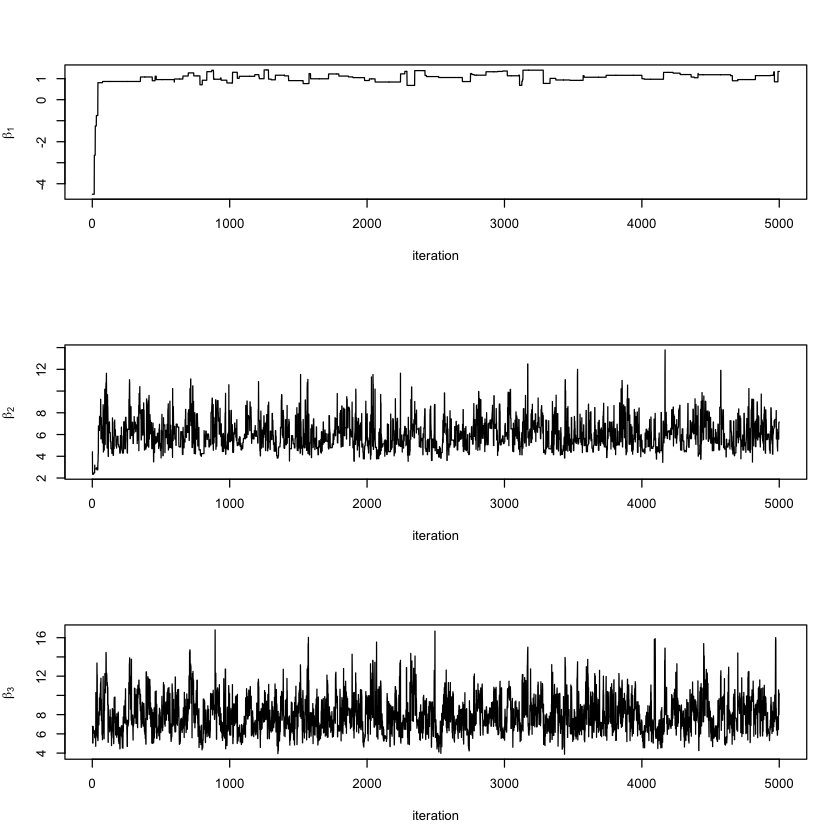

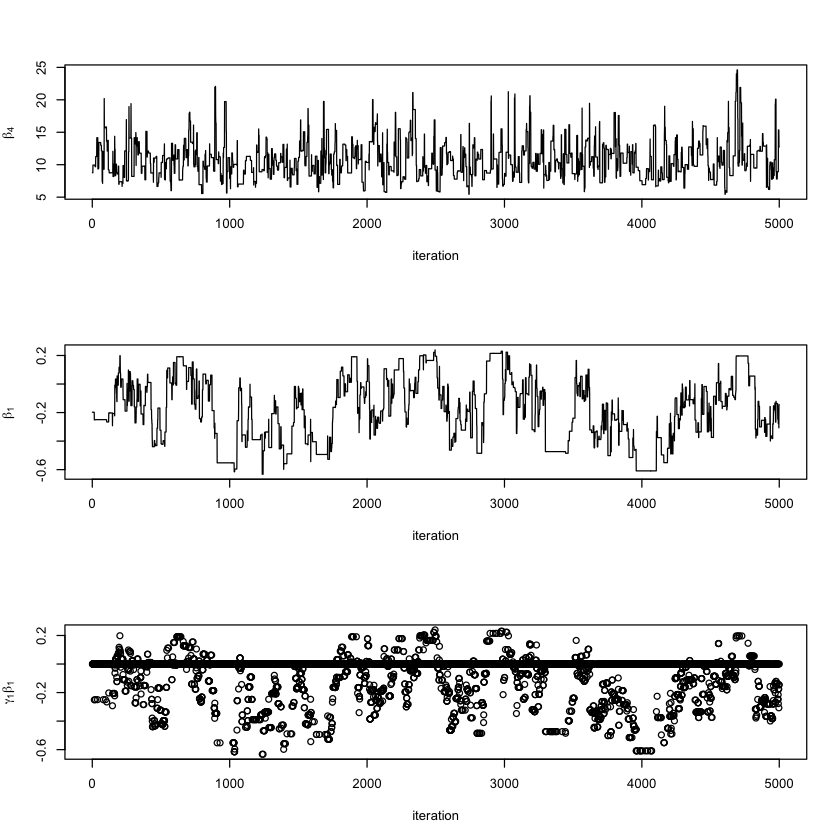

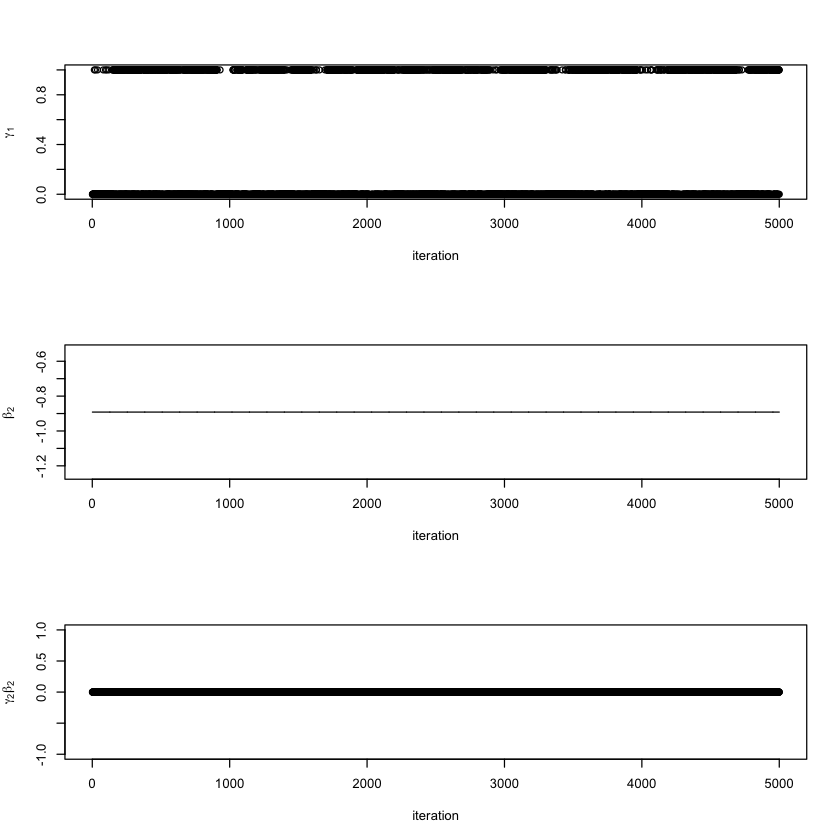

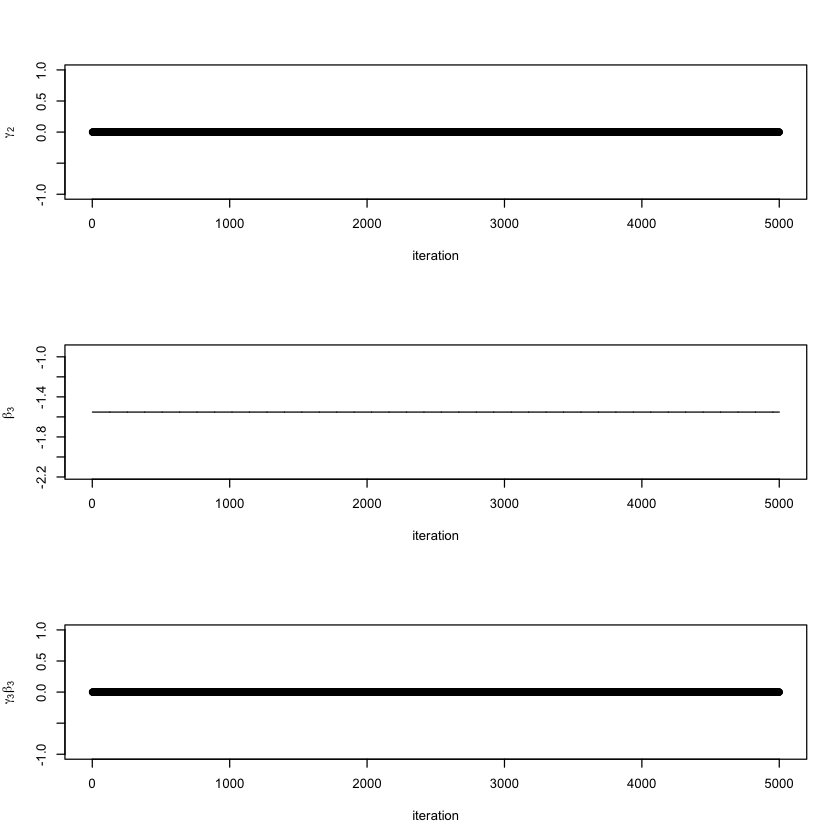

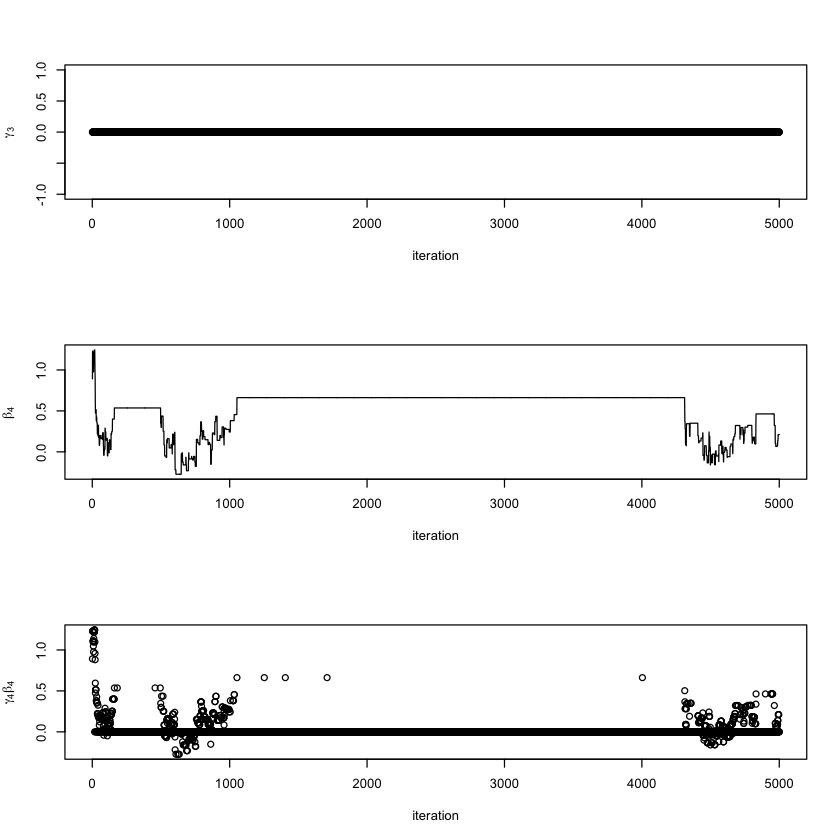

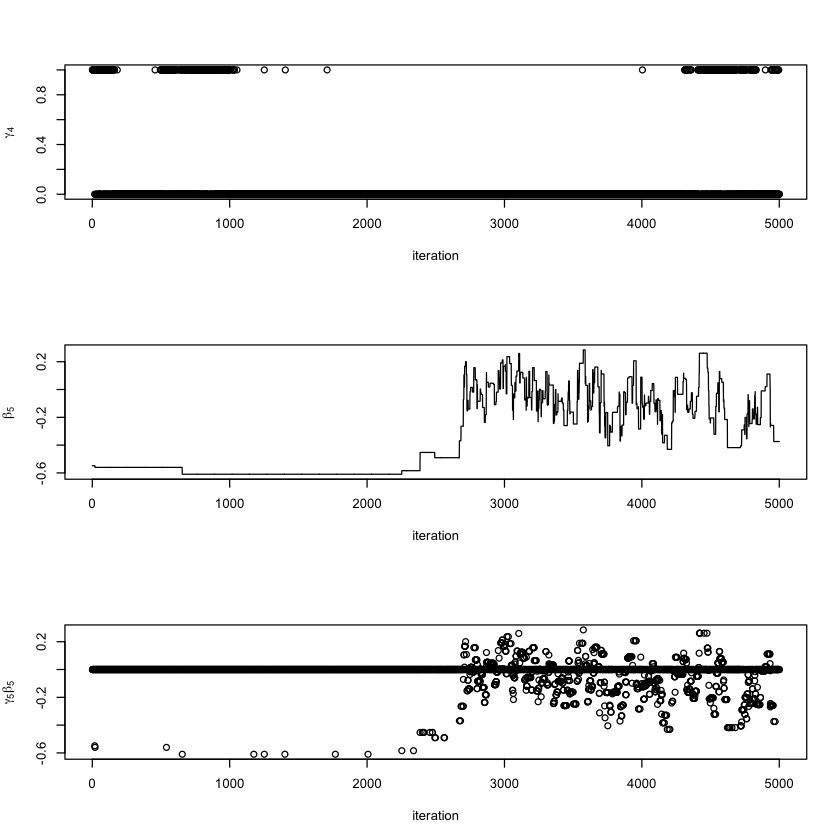

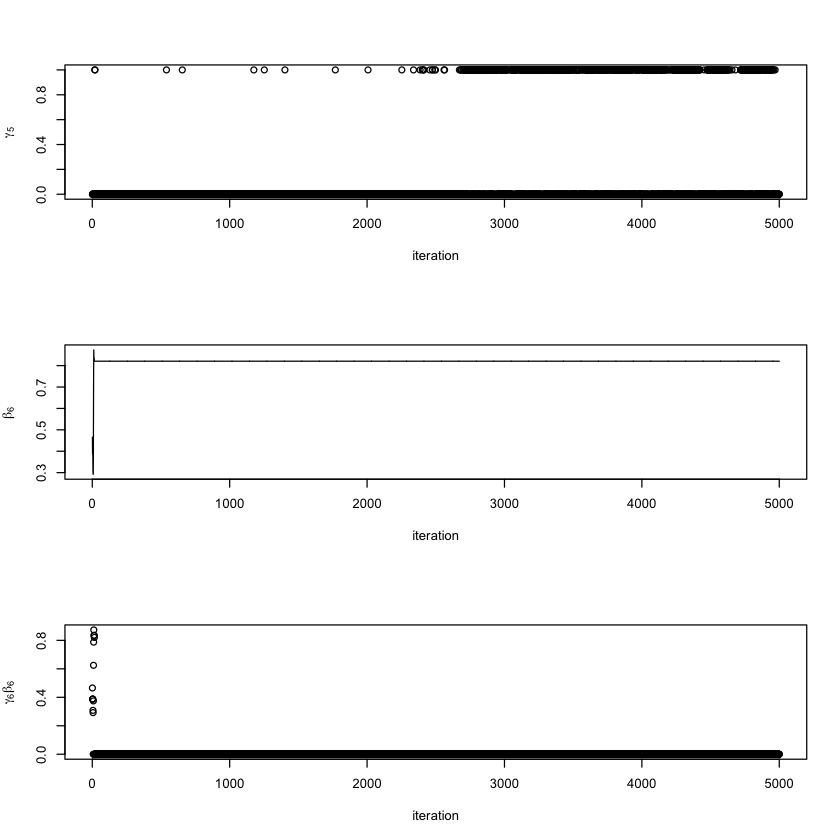

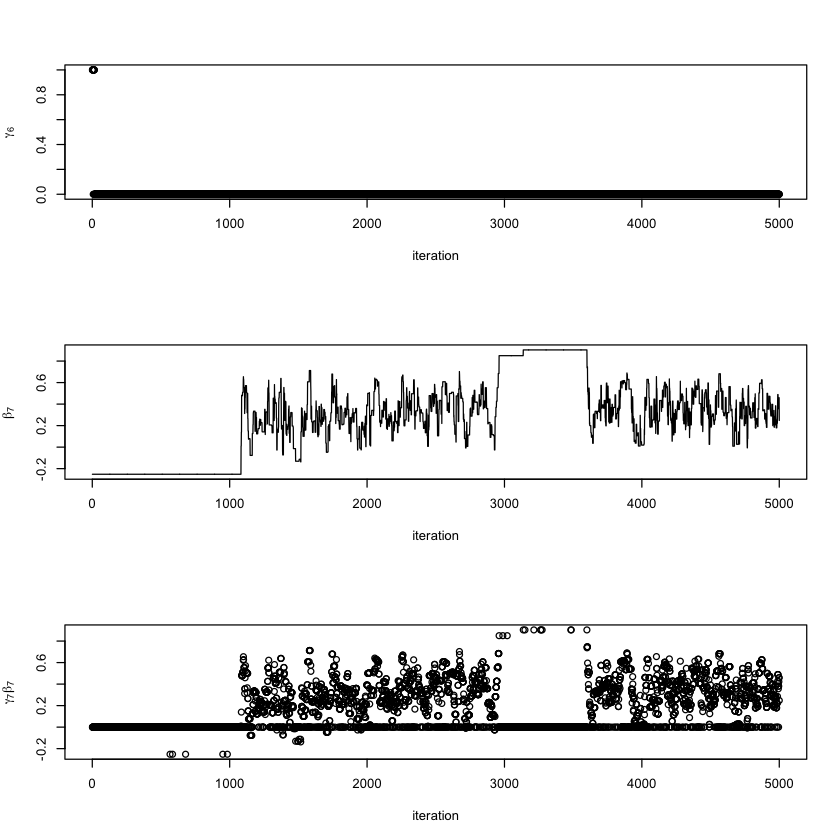

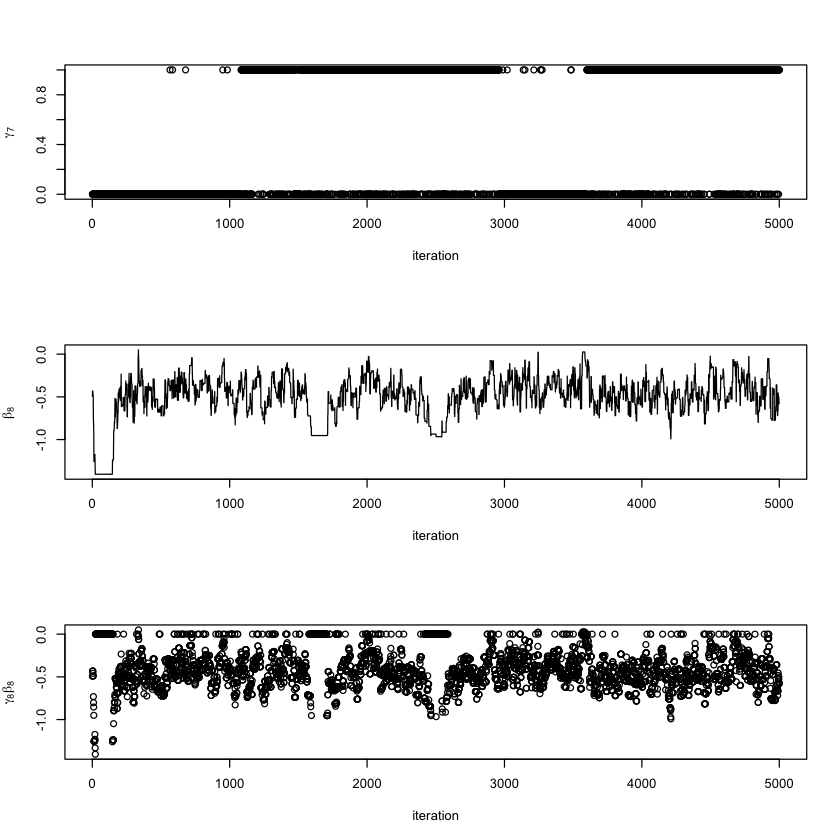

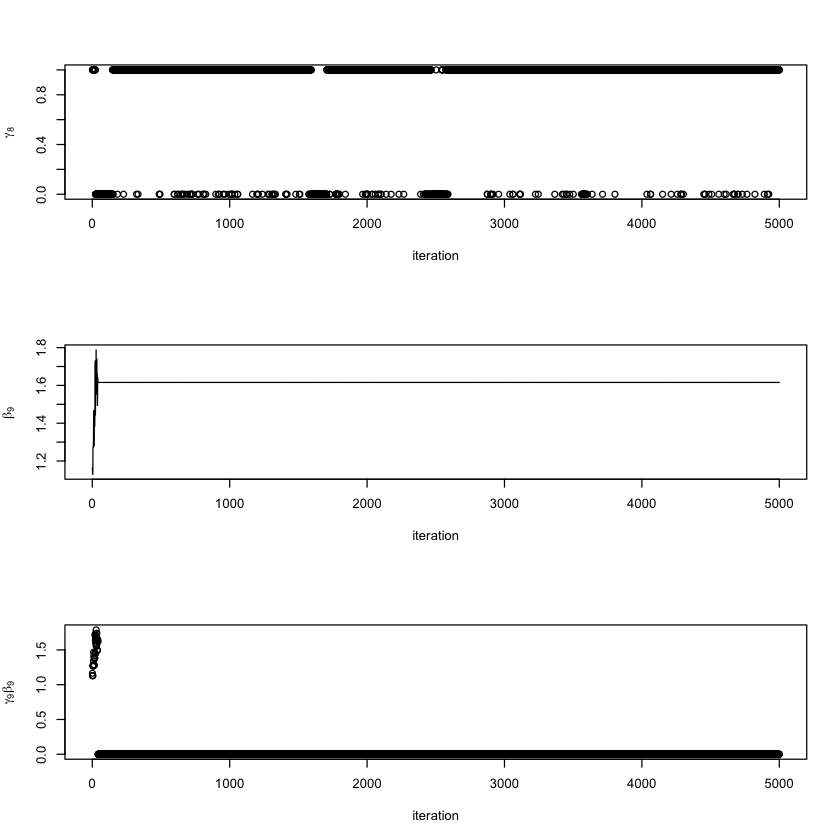

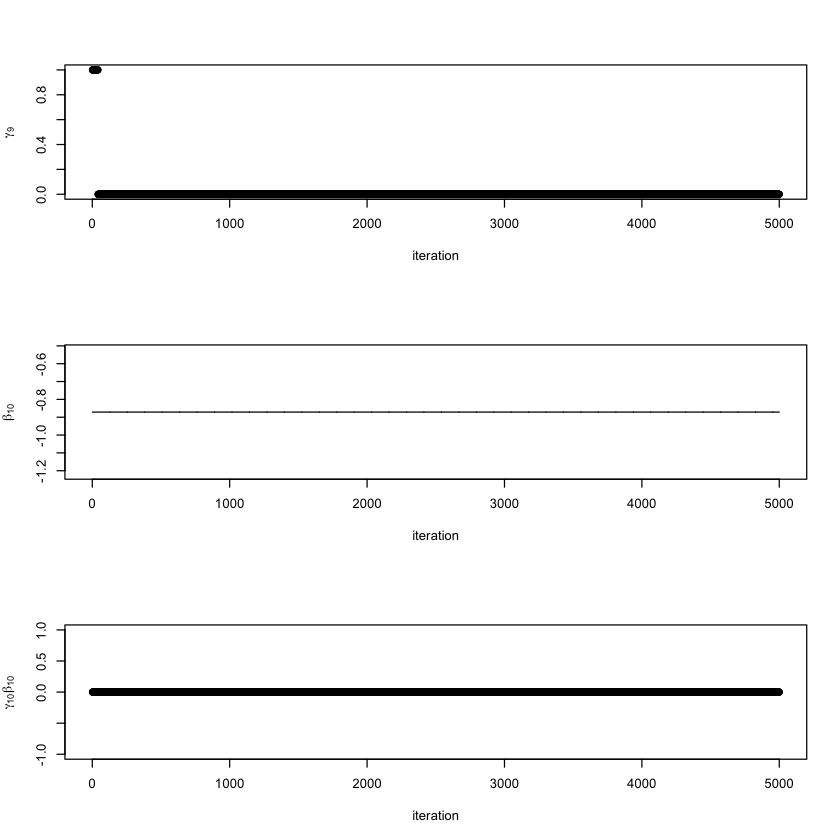

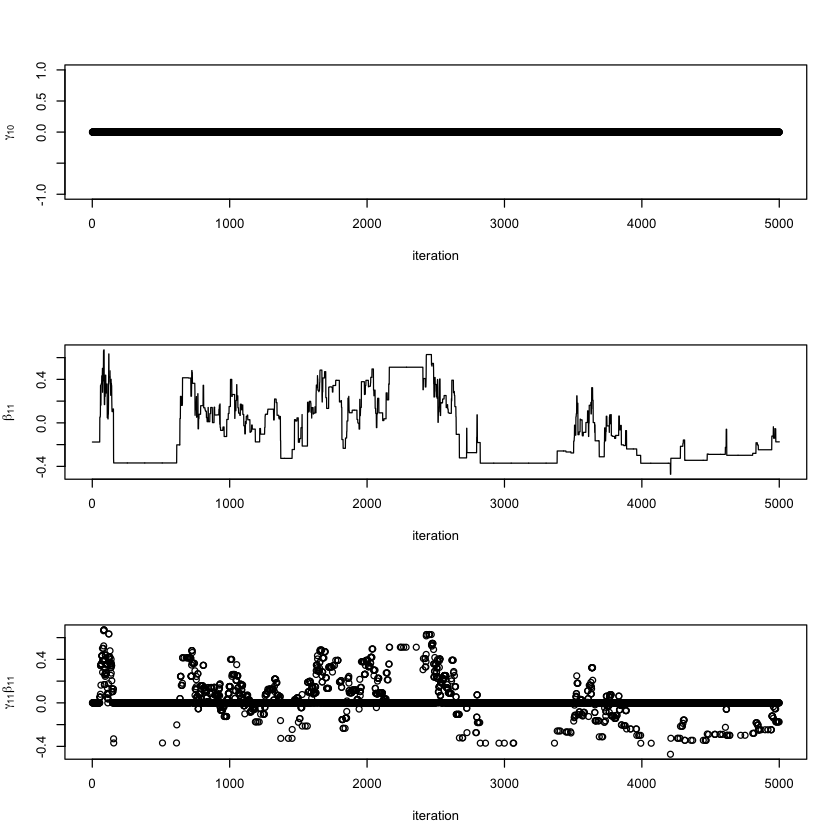

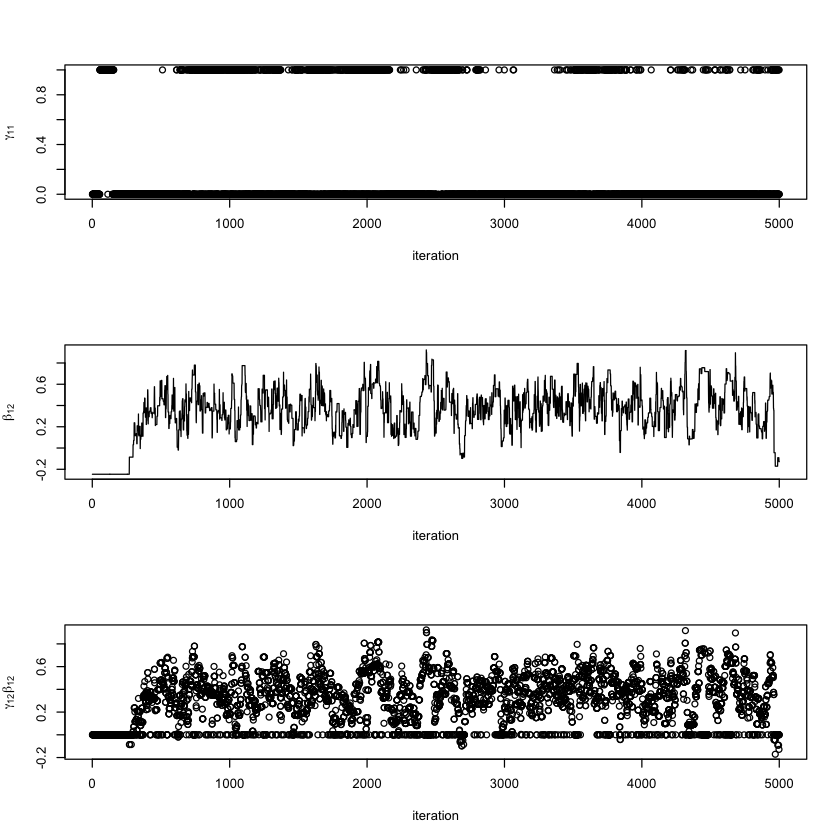

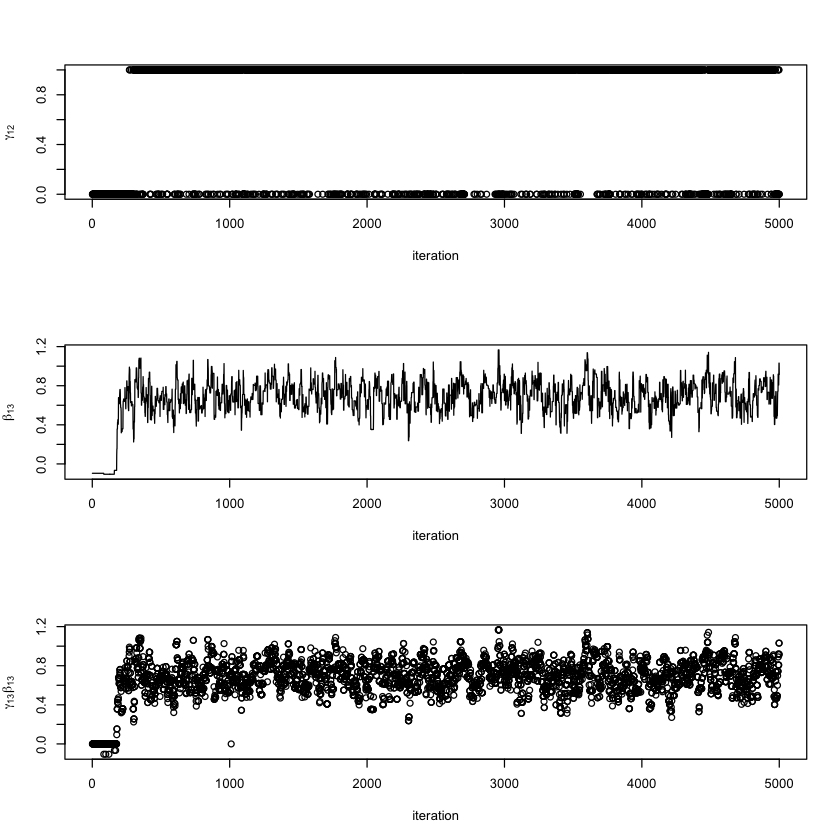

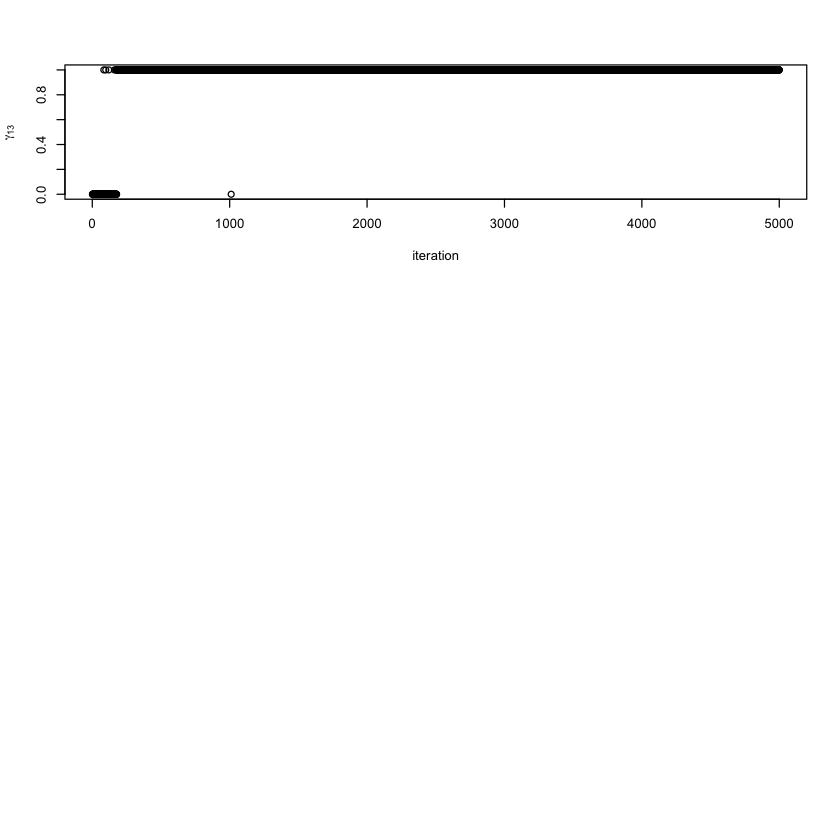

In [48]:
par(bg='white',mfrow=c(3,1))
for(i in 1:p_y){
    plot(Beta_int[,i],type='l',ylab=bquote(beta[.(i)]),xlab='iteration')
}
for(i in 1:p){
    plot(Beta[,i],type='l',ylab=bquote(beta[.(i)]),xlab='iteration')
    plot(Gamma[,i]*Beta[,i],ylab=bquote(gamma[.(i)]*beta[.(i)]),xlab='iteration')
    plot(Gamma[,i],ylab=bquote(gamma[.(i)]),xlab='iteration')
}